## Setup

In [1]:
SetDirectory["~/Documents/Univ/2nd_GW_QCD"];

In [2]:
SetOptions[{Plot,LogPlot,LogLinearPlot,LogLogPlot},
           {ImageSize->Large,
            Frame->True,
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3]}];
SetOptions[{ListPlot,ListLogPlot,ListLogLinearPlot,ListLogLogPlot},
           {ImageSize->Large,
            Frame->True, 
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3],
            Joined->True}];
RGBData = {"#5E81B5","#E19C24","#8FB032","#EB6235","#8778B3","#C56E1A","#5D9EC7","#FFBF00","#A5609D","#929600","#E95536","#6685D9","#F89F13","#BC5B80","#47B66D"};
Color = Map[RGBColor,RGBData];

In [90]:
$ProcessorCount

2

In [91]:
Unprotect[$ProcessorCount]; $ProcessorCount = 4
SetSystemOptions["ParallelOptions" -> "MathLinkTimeout" -> 100.];

4

{KernelObject[4, local]}
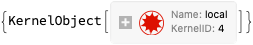

In [97]:
LaunchKernels[1]

{KernelObject[1, local], KernelObject[2, local], KernelObject[3, local], 
 
>   KernelObject[4, local]}
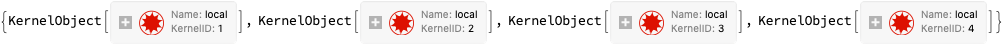

In [98]:
Kernels[]

In [99]:
ParallelEvaluate[SetOptions[{Plot,LogPlot,LogLinearPlot,LogLogPlot},
           {ImageSize->Large,
            Frame->True,
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3]}];
SetOptions[{ListPlot,ListLogPlot,ListLogLinearPlot,ListLogLogPlot},
           {ImageSize->Large,
            Frame->True,
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3],
            Joined->True}];
RGBData = {"#5E81B5","#E19C24","#8FB032","#EB6235","#8778B3","#C56E1A","#5D9EC7","#FFBF00","#A5609D","#929600","#E95536","#6685D9","#F89F13","#BC5B80","#47B66D"};
Color = Map[RGBColor,RGBData];]

{Null, Null, Null, Null}

## Background

In [6]:
ai = {1,1.11724,3.12672 10^(-1),-4.68049 10^(-2),-2.65004 10^(-2),-1.19760 10^(-3),1.82812 10^(-4),1.36436 10^(−4),8.55051 10^(−5),1.22840 10^(−5),3.82259 10^(-7),−6.87035 10^(−9)};
bi = {1.43382 10^(−2),1.37559 10^(−2),2.92108 10^(−3),−5.38533 10^(−4),−1.62496 10^(−4),−2.87906 10^(−5),−3.84278 10^(−6),2.78776 10^(−6),7.40342 10^(−7),1.17210 10^(−7),3.72499 10^(−9),−6.74107 10^(−11)};
ci = {1,6.07869 10^(−1),−1.54485 10^(−1),−2.24034 10^(−1),−2.82147 10^(−2),2.90620 10^(−2),6.86778 10^(−3),−1.00005 10^(−3),−1.69104 10^(−4),1.06301 10^(−5),1.69528 10^(−6),−9.33311 10^(−8)};
di = {7.07388 10,9.18011 10,3.31892 10,−1.39779,−1.52558,−1.97857 10^(−2),−1.60146 10^(−1),8.22615 10^(−5),2.02651 10^(−2),−1.82134 10^(−5),7.83943 10^(−5),7.13518 10^(−5)};

In [10]:
grhohigh[T_] = Sum[ai[[i]]Log[T]^(i-1),{i,12}] / Sum[bi[[i]]Log[T]^(i-1),{i,12}];
gshigh[T_] = grhohigh[T] / (1 + Sum[ci[[i]]Log[T]^(i-1),{i,12}]/Sum[di[[i]]Log[T]^(i-1),{i,12}]);

In [12]:
rhohigh[T_] = \[Pi]^2/30 grhohigh[T] T^4;
shigh[T_] = 2\[Pi]^2/45 gshigh[T] T^3;
phigh[T_] = Simplify[T shigh[T] - rhohigh[T]];

In [15]:
Sfit[x_] = 1 + 7/4 Exp[−1.0419x](1 + 1.034x + 0.456426x^2 + 0.0595249x^3);
frho[x_] = Exp[−1.04855x](1 + 1.03757x + 0.508630x^2 + 0.0893988x^3);
brho[x_] = Exp[−1.03149x](1 + 1.03317x + 0.398264x^2 + 0.0648056x^3);
fs[x_] = Exp[−1.04190x](1 + 1.03400x + 0.456426x^2 + 0.0595248x^3);
bs[x_] = Exp[−1.03365x](1 + 1.03397x + 0.342548x^2 + 0.0506182x^3);

In [20]:
me = 511 10^(-6);
mmu = 0.1056;
mpi0 = 0.13;
mpipm = 0.140;
m1 = 0.5;
m2 = 0.77;
m3 = 1.2;
m4 = 2;

In [28]:
Tnu[T_] = (4/11)^(1/3) Sfit[me/T]^(1/3) T;

In [29]:
grhogammalow[T_] = 2.030 + 3.495frho[me/T] + 3.446frho[mmu/T] + 1.05brho[mpi0/T] + 2.08brho[mpipm/T] + 4.165brho[m1/T] + 30.55brho[m2/T] + 89.4brho[m3/T] + 8209brho[m4/T];
gsgammalow[T_] = 2.008 + 3.442fs[me/T] + 3.468fs[mmu/T] + 1.034bs[mpi0/T] + 2.068bs[mpipm/T] + 4.16bs[m1/T] + 30.55bs[m2/T] + 90bs[m3/T] + 6209bs[m4/T];
grhonulow[T_] = 1.353Sfit[me/T]^(4/3);
gsnulow[T_] = 1.923Sfit[me/T];

In [33]:
rhogammalow[T_] = \[Pi]^2/30 grhogammalow[T] T^4;
sgammalow[T_] = 2\[Pi]^2/45 gsgammalow[T] T^3;
rhonulow[T_] = \[Pi]^2/30 grhonulow[T] T^4;
snulow[T_] = 2\[Pi]^2/45 gsnulow[T] T^3;
pgammalow[T_] = Simplify[T sgammalow[T] - rhogammalow[T]];
pnulow[T_] = Simplify[Tnu[T] snulow[T] - rhonulow[T]];
rholow[T_] = Simplify[rhogammalow[T] + rhonulow[T]];
plow[T_] = Simplify[pgammalow[T] + pnulow[T]];

In [41]:
Tth = 0.12;

In [42]:
grho[T_] := grhohigh[T] /; T>=Tth
grho[T_] := grhogammalow[T] + grhonulow[T] /; T<Tth
grhop[T_] := grhohigh'[T] /; T>=Tth
grhop[T_] := grhogammalow'[T] + grhonulow'[T] /; T<Tth
gs[T_] := gshigh[T] /; T>=Tth
gs[T_] := gsgammalow[T] + gsnulow[T] /; T<Tth

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[Opacity[1.], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       Dashing[{Small, Small}], AbsoluteThickness[2]]}, {g   , g   }, 
                                                           * ρ   * s
 
>     LegendMarkers -> None, LabelStyle -> 
 
>      Directive[GrayLevel[0], Large, FontFamily -> Palatino], LegendLayout -> Column], 
 
>    {0.2, 0.8}, Identity]]
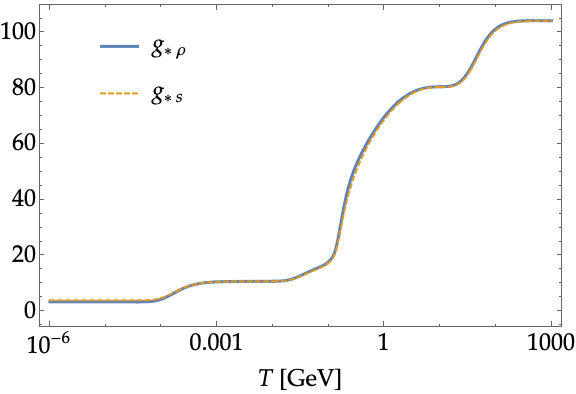

In [48]:
LogLinearPlot[{grho[T],gs[T]},{T,10^(-6),10^3}, FrameLabel->{Row[{T, " [GeV]"}],None}, PlotStyle->{AbsoluteThickness[3],{Dashed,AbsoluteThickness[2]}}, 
              PlotLegends->Placed[{Subscript[g,"*"\[Rho]],Subscript[g,"*"s]}, {0.2,0.8}]] // Quiet

In [48]:
rho[T_] := rhohigh[T] /; T>=Tth
rho[T_] := rholow[T] /; T<Tth
press[T_] := phigh[T] /; T>=Tth
press[T_] := plow[T] /; T<Tth

In [52]:
EoSw[T_] = press[T] / rho[T];
cs2[T_] := phigh'[T] / rhohigh'[T] /; T>=Tth (*4(4gshigh[T]+T gshigh'[T])/3/(4grhohigh[T]+T grhohigh'[T]) - 1 /; T>=Tth;*)
cs2[T_] := plow'[T] / rholow'[T] /; T<Tth


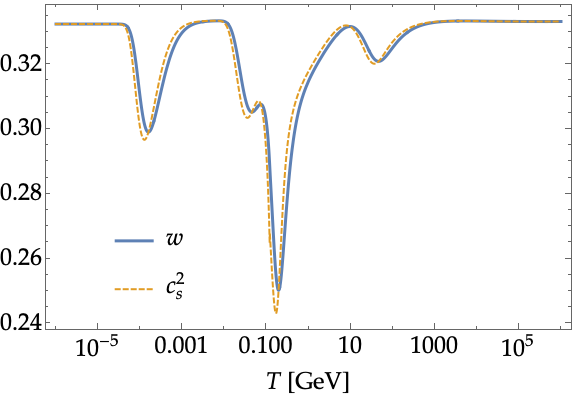

In [ ]:
LogLinearPlot[{EoSw[T],cs2[T]},{T,10^-6,10^6},PlotRange->Full,PlotStyle->{AbsoluteThickness[3],{AbsoluteThickness[2],Dashed}}, 
              FrameLabel->{Row[{T," [GeV]"}],None}, PlotLegends->Placed[{w,Subscript[c,s]^2}, {0.2,0.2}]] // Quiet


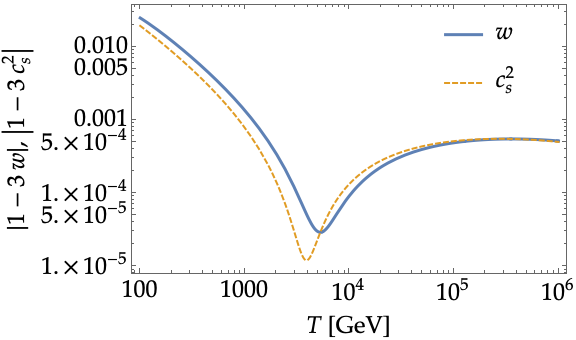

In [ ]:
LogLogPlot[{Abs[1-3EoSw[T]],Abs[1-3cs2[T]]},{T,100,10^6}, FrameLabel->{Row[{T, " [GeV]"}], Row[{Abs[1-3w], ", ", Abs[1-3 Subscript[c,s]^2]}]}, 
           PlotStyle->{AbsoluteThickness[3],{AbsoluteThickness[2],Dashed}}, PlotLegends->Placed[{w,Subscript[c,s]^2}, {0.8,0.8}]]

In [55]:
Mpl = 2.435 10^18;
KinGeV = 1 / (1.160451812 10^4) 10^(-9)
Mpcinm = 3.08568 10^22;
GeVinminv = 10^9 / (1.97327 10^(-7))
GeVinMpcinv = GeVinminv Mpcinm

-14
8.61733 10
          15
5.06773 10
          38
1.56374 10

In [60]:
grho0 = grho[10^(-6)] // Quiet
gs0 = gs[10^(-6)] // Quiet
T0 = 2.725 KinGeV

3.383
3.931
          -13
2.34822 10

In [63]:
scalea[T_] = (gs0/gs[T])^(1/3) T0/T;
calH[T_] = Sqrt[scalea[T]^2rho[T]/3/Mpl^2] GeVinMpcinv (*Mpc^-1*);

In [65]:
Ti = 10^6;
rhoi = rho[Ti]
etai = 1/calH[Ti]
scaleai = scalea[Ti]

25
3.4384 10
          -14
5.84589 10
          -20
7.86804 10

In [69]:
etaf = 0.1;

In [70]:
bgsol = NDSolve[{T'[eta] == -\[Pi]/Sqrt[10] gs0^(1/3)T0/Mpl 
                 (1+EoSw[T[eta]])grho[T[eta]]^(3/2)T[eta]^2 / (gs[T[eta]]^(1/3)
                                                                  (grhop[T[eta]]T[eta]+4grho[T[eta]])) GeVinMpcinv,
                 T[etai] == Ti},
                T[eta],{eta,etai,etaf}, WorkingPrecision->30][[1]]; // Quiet // AbsoluteTiming

{5.94753, Null}

In [71]:
Tsol[eta_] = T[eta] /. bgsol;
calHsol[eta_] = calH[Tsol[eta]];
asol[eta_] = scalea[Tsol[eta]];
EoSwsol[eta_] = EoSw[Tsol[eta]];
cs2sol[eta_] := cs2[Tsol[eta]];
grhosol[eta_] = grho[Tsol[eta]];
gssol[eta_] = gs[Tsol[eta]];

In [78]:
EoSwList = Table[{10^logeta, EoSwsol[10^logeta]},{logeta,Log10[etai],Log10[etaf],0.01}];
cs2List = Table[{10^logeta,cs2sol[10^logeta]},{logeta,Log10[etai],Log10[etaf],0.01}];
EoSwint[eta_] = Interpolation[EoSwList][eta];
cs2int[eta_] = Interpolation[cs2List][eta];

`1` is too small to represent as a normalized machine number; precision may be lost.: Exp[-718.442] is too small to represent as a normalized machine number; precision may be lost.

`1` is too small to represent as a normalized machine number; precision may be lost.: Exp[-719.947] is too small to represent as a normalized machine number; precision may be lost.

`1` is too small to represent as a normalized machine number; precision may be lost.: Exp[-718.442] is too small to represent as a normalized machine number; precision may be lost.

Further output of `1` will be suppressed during this calculation.: Further output of General::munfl will be suppressed during this calculation.


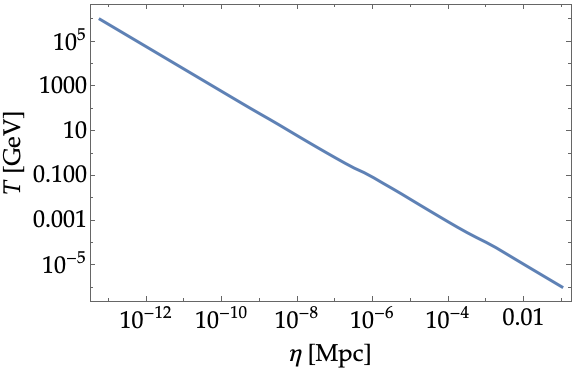

In [ ]:
Tvseta = LogLogPlot[Tsol[eta],{eta,etai,etaf},FrameLabel->{Row[{\[Eta], " [Mpc]"}], Row[{T, " [GeV]"}]}]

In [ ]:
Export["git/paper/QCD_GW/figYT/T_eta.pdf",Tvseta];


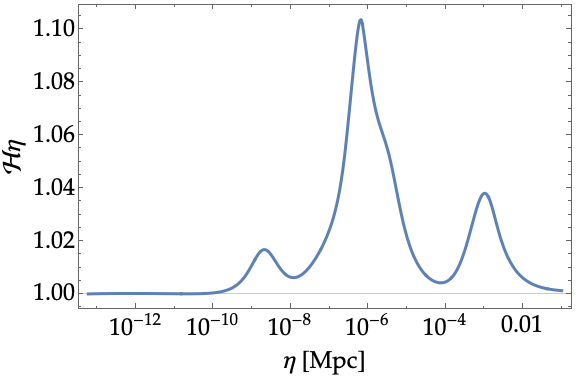

In [ ]:
calHvseta = LogLinearPlot[calHsol[eta]eta,{eta,etai,etaf},PlotRange->Full,GridLines->{None,{1}},FrameLabel->{Row[{\[Eta], " [Mpc]"}],\[ScriptCapitalH]\[Eta]}]

In [ ]:
Export["git/paper/QCD_GW/figYT/calH_eta.pdf",calHvseta];


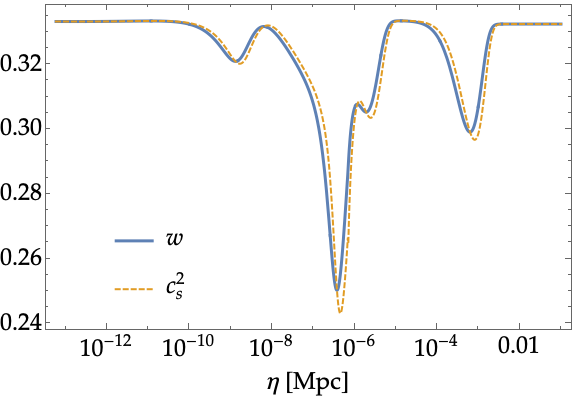

In [ ]:
LogLinearPlot[{EoSwint[eta],cs2int[eta]},{eta,etai,etaf},PlotRange->Full, PlotStyle->{AbsoluteThickness[3],{AbsoluteThickness[2],Dashed}},
              FrameLabel->{Row[{\[Eta], " [Mpc]"}],None}, PlotLegends->Placed[{w,Subscript[c,s]^2}, {0.2,0.2}]] // Quiet

## Perturbation練習

In [85]:
k = 10^6;

In [86]:
xi = 0.01;
xf = 1000;

In [94]:
ptbsol = NDSolve[{Phi''[x] + 3calHsol[x/k](1+cs2int[x/k])/k Phi'[x] + (cs2int[x/k]+3calHsol[x/k]^2(cs2int[x/k]-EoSwint[x/k])/k^2)Phi[x] == 0,
                 Phi[xi] == 1, Phi'[xi] == 0},
                  Phi[x],{x,xi,xf}, (*WorkingPrecision->30,*) MaxSteps->10^5][[1]]; // AbsoluteTiming

{0.728931, Null}

In [95]:
Phisol[x_] = Phi[x] /. ptbsol;

-Graphics-
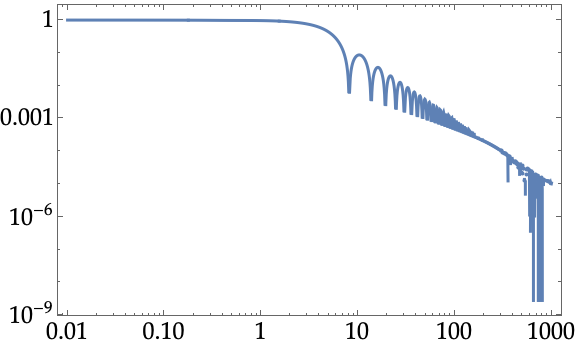

In [96]:
LogLogPlot[Abs[Phisol[x]],{x,xi,xf},PlotPoints->20]

## Solve scalar PTB

In [83]:
xi = 0.01;
xf = 1000;

In [87]:
PhiList[x_] = Table[{k=10^logk;k,
                    ptbsol = NDSolve[{Phi''[x] + 3calHsol[x/k](1+cs2int[x/k])/k Phi'[x] + (cs2int[x/k]+3calHsol[x/k]^2(cs2int[x/k]-EoSwint[x/k])/k^2)Phi[x] == 0,
                    Phi[xi] == 1, Phi'[xi] == 0},
                    Phi[x],{x,xi,xf}, (*WorkingPrecision->30,*) MaxSteps->10^5][[1]] // Quiet;
                    Phi[x] /. ptbsol},
                    {logk,4,10,0.01}]; // AbsoluteTiming
Clear[k];

{478.189, Null}

In [94]:
Export["git/num/neutrino/PhiList.wdx",PhiList[x]]; // AbsoluteTiming

{31.0929, Null}

In [89]:
calPList[x_] = Table[{k=PhiList[x][[i,1]];k,
                      PhiList[x][[i,2]]^2 + D[PhiList[x][[i,2]],x]^2/cs2int[x/k]},{i,Length[PhiList[x]]}]; // AbsoluteTiming
Clear[k];

{0.905159, Null}

In [91]:
PhiRad[x_] = 9/x^2 (Sin[x/Sqrt[3]]/(x/Sqrt[3]) - Cos[x/Sqrt[3]]);
calPRad[x_] = PhiRad[x]^2 + PhiRad'[x]^2/(1/3);

-Graphics-
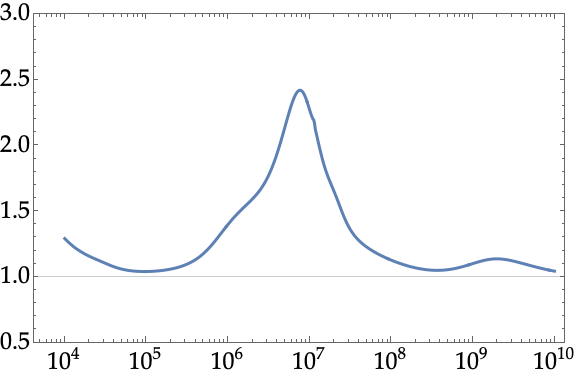

In [93]:
ListLogLinearPlot[calPList[x].DiagonalMatrix[{1,calPRad[x]^(-1)}] /. {x->8},PlotRange->{0.5,3},GridLines->{None,{1}}]

In [ ]:
PhiList[x_] = Import["git/num/neutrino/PhiList.wdx"];

In [ ]:
calPList[x_] = Table[{k=PhiList[x][[i,1]];k,
                      PhiList[x][[i,2]]^2 + D[PhiList[x][[i,2]],x]^2/cs2sol[x/k]},{i,Length[PhiList[x]]}]; // AbsoluteTiming
Clear[k];


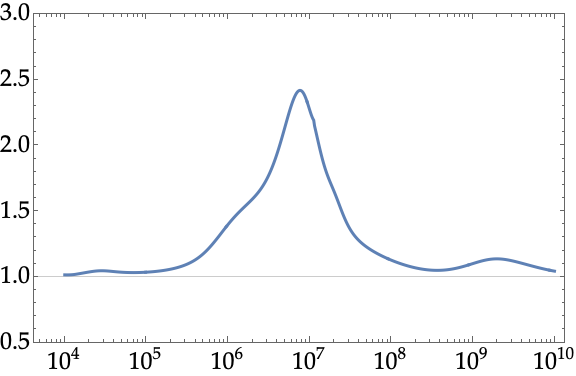

In [ ]:
ListLogLinearPlot[calPList[8].DiagonalMatrix[{1,calPRad[8]^(-1)}],PlotRange->{0.5,3},GridLines->{None,{1}}]

-Graphics-
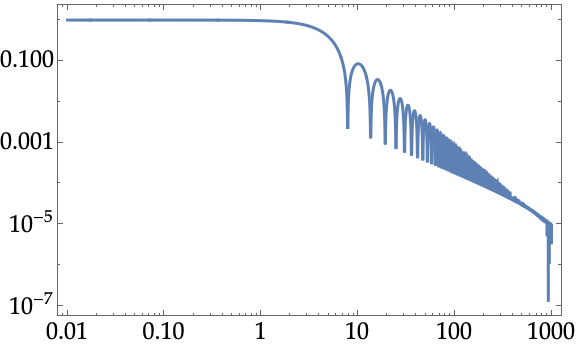

In [125]:
LogLogPlot[Abs[PhiList[x][[Length[PhiList[x]],2]]], {x,xi,xf}]

In [ ]:
Length[PhiList[x]]

601

Out[627]:
 
 
 
 
 Out[628]:
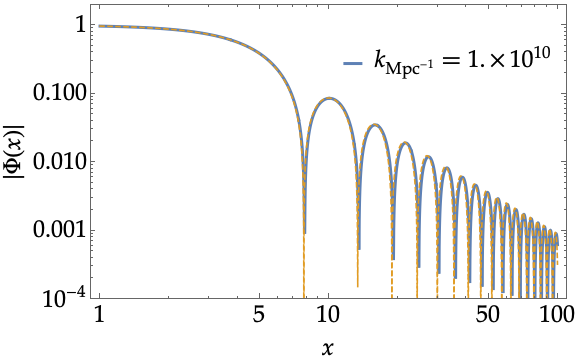

In [ ]:
i = 601;
kref = PhiList[x][[i,1]]
FigPhix = LogLogPlot[{Abs[PhiList[x][[i,2]]],Abs[PhiRad[x]]},{x,1,100},
                     PlotStyle->{AbsoluteThickness[3],Dashed},PlotRange->{10^-4,2},
                     FrameLabel->{x,Abs[\[CapitalPhi][x]]},
                     PlotLegends->Placed[{Subscript[k,Superscript[Mpc,-1]] == ScientificForm[kref,2],None},{0.75,0.8}]]

In [ ]:
Export["git/paper/QCD_GW/figYT/Phix_1e+10.pdf",FigPhix];


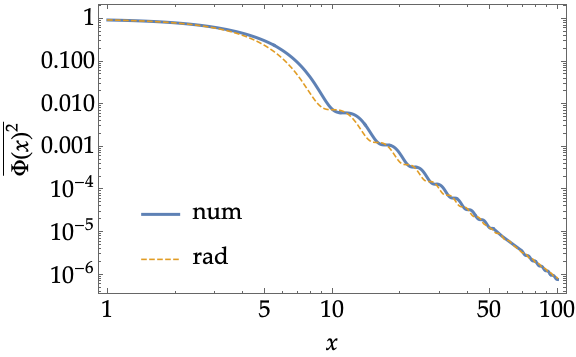

In [ ]:
FigCalP = LogLogPlot[{calPList[x][[290,2]],calPRad[x]},{x,1,100},
                     PlotStyle->{AbsoluteThickness[3],Dashed},
                     FrameLabel->{x,OverBar[\[CapitalPhi][x]^2]},
                     PlotLegends->Placed[{"num","rad"},{0.2,0.2}]]

In [ ]:
Export["git/paper/QCD_GW/figYT/calPPhi.pdf",FigCalP];


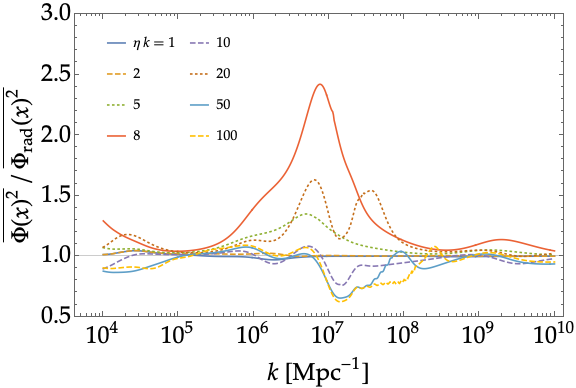

In [ ]:
FigSpec = ListLogLinearPlot[{(calPList[x].DiagonalMatrix[{1,calPRad[x]^(-1)}] /. {x->1}),
                             (calPList[x].DiagonalMatrix[{1,calPRad[x]^(-1)}] /. {x->2}),
                             (calPList[x].DiagonalMatrix[{1,calPRad[x]^(-1)}] /. {x->5}),
                             (calPList[x].DiagonalMatrix[{1,calPRad[x]^(-1)}] /. {x->8}),
                             (calPList[x].DiagonalMatrix[{1,calPRad[x]^(-1)}] /. {x->10}),
                             (calPList[x].DiagonalMatrix[{1,calPRad[x]^(-1)}] /. {x->20}),
                             (calPList[x].DiagonalMatrix[{1,calPRad[x]^(-1)}] /. {x->50}),
                             (calPList[x].DiagonalMatrix[{1,calPRad[x]^(-1)}] /. {x->100})},
                            PlotRange->{0.5,3},GridLines->{None,{1}},
                            PlotStyle->{Automatic,Dashed,Dotted,Automatic,Dashed,Dotted,Automatic,Dashed},
                            PlotLegends->Placed[LineLegend[{k \[Eta] == 1,2,5,8,10,20,50,100},
                                                           LegendLayout->{"Column",2},
                                                           LabelStyle->Directive[Larger,Black,FontFamily->"Palatino"],
                                                           LegendMarkerSize->20],{0.2,0.75}],
                            FrameLabel->{Row[{k, " [", Superscript["Mpc",-1], "]"}],
                                         Row[{OverBar[\[CapitalPhi][x]^2], " / ", OverBar[Subscript[\[CapitalPhi],rad][x]^2]}]}
                           ]

In [ ]:
Export["git/paper/QCD_GW/figYT/Phi_spectrum.pdf",FigSpec];

In [ ]:
FigSpecList = Table[ListLogLinearPlot[calPList[10^logx].DiagonalMatrix[{1,calPRad[10^logx]^(-1)}],
                                              PlotRange->{0.5,3},GridLines->{None,{1}},
                                              PlotLegends->Placed[{k \[Eta] == 10^logx},{0.8,0.8}],
                                              FrameLabel->{Row[{k, " [", Superscript["Mpc",-1], "]"}],
                                                           Row[{OverBar[\[CapitalPhi][x]^2], " / ", OverBar[Subscript[\[CapitalPhi],rad][x]^2]}]}
                                             ],{logx,0,2,0.01}]; // AbsoluteTiming

In [ ]:
Export["neutrino/Phi_spectrum_4-10_py.gif",FigSpecList]; // AbsoluteTiming

## Monochromatic練習

In [ ]:
PhiList[x_] = Import["git/num/PhiList.wdx"]; // AbsoluteTiming

In [ ]:
xi = 0.01;
xf = 1000;
k7 = PhiList[x][[301,1]]
Phi7[x_] = PhiList[x][[301,2]];
Phi7p[x_] = D[Phi7[x],x];

7
1. 10


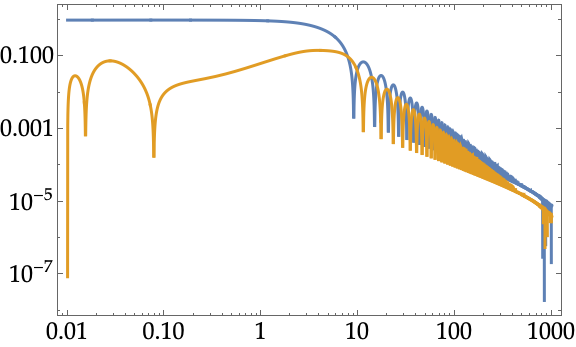

In [ ]:
LogLogPlot[{Abs[Phi7[x]],Abs[Phi7p[x]]},{x,xi,xf}]

In [ ]:
Is7[x_] := NIntegrate[asol[xp/k7]/(xp/k7) xp Sin[xp]
                     (2Phi7[xp]^2 + 4/3/(1+EoSwsol[xp/k7]) (Phi7[xp] + k7/calHsol[xp/k7] Phi7p[xp])^2) ,{xp,xi,x}(*,
                     WorkingPrecision->30*)]
Ic7[x_] := NIntegrate[asol[xp/k7]/(xp/k7) xp Cos[xp]
                     (2Phi7[xp]^2 + 4/3/(1+EoSwsol[xp/k7]) (Phi7[xp] + k7/calHsol[xp/k7] Phi7p[xp])^2) ,{xp,xi,x}(*,
                     WorkingPrecision->30*)]
I2bar7[x_] := (Is7[x]^2+Ic7[x]^2)/2

In [ ]:
Az = 0.01;
OGW7[x_] := 8/243 (asol[x/k7]calHsol[x/k7])^(-2) (1-1/4)^2 I2bar7[x] Az^2

In [ ]:
OGW7List = ParallelTable[{10^logx, OGW7[10^logx] // Quiet}, {logx,Log10[xi],Log10[xf],0.01}]; // AbsoluteTiming

Launching kernels...



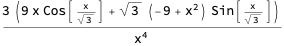

In [ ]:
aRad[eta_] = scaleai(eta/etai);
PhiRad[x_] = 9/x^2 (Sin[x/Sqrt[3]]/(x/Sqrt[3]) - Cos[x/Sqrt[3]]);
PhiRadp[x_] = D[PhiRad[x],x] // Simplify

In [ ]:
Is7Rad[x_] = Integrate[scaleai/etai xp Sin[xp]
                     (2PhiRad[xp]^2 + (PhiRad[xp] + xp PhiRadp[xp])^2) ,{xp,xi,x}] // Simplify; 
Ic7Rad[x_] = Integrate[scaleai/etai xp Cos[xp]
                     (2PhiRad[xp]^2 + (PhiRad[xp] + xp PhiRadp[xp])^2) ,{xp,xi,x}] // Simplify;
I2bar7Rad[x_] = Abs[(Is7Rad[x]^2+Ic7Rad[x]^2)/2];

In [ ]:
OGW7Rad[x_] = 8/243 (aRad[x/k7]/(x/k7))^(-2) (1-1/4)^2 I2bar7Rad[x] Az^2;


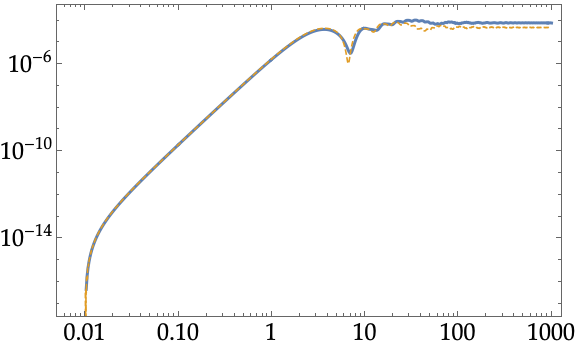

In [ ]:
Show[ListLogLogPlot[OGW7List], LogLogPlot[OGW7Rad[x],{x,xi,xf},PlotStyle->{Color[[2]],Dashed}]]

## Monochromatic Spectrum

In [ ]:
PhiList[x_] = Import["git/num/PhiList.wdx"]; // AbsoluteTiming

In [ ]:
xi = 0.01;
xf = 1000;

In [ ]:
PhiMode[x_] = Table[PhiList[x][[i,2]],{i,Length[PhiList[x]]}];
PhipMode[x_] = Table[D[PhiMode[x][[i]],x],{i,Length[PhiMode[x]]}];
kList = Table[PhiList[x][[i,1]],{i,Length[PhiList[x]]}];

In [ ]:
Is[i_,x_] := NIntegrate[asol[xp/kList[[i]]]/(xp/kList[[i]]) xp Sin[xp]
                     (2PhiMode[xp][[i]]^2 + 4/3/(1+EoSwsol[xp/kList[[i]]]) 
                      (PhiMode[xp][[i]] + kList[[i]]/calHsol[xp/kList[[i]]] PhipMode[xp][[i]])^2) ,{xp,xi,x}]
Ic[i_,x_] := NIntegrate[asol[xp/kList[[i]]]/(xp/kList[[i]]) xp Cos[xp]
                     (2PhiMode[xp][[i]]^2 + 4/3/(1+EoSwsol[xp/kList[[i]]]) 
                      (PhiMode[xp][[i]] + kList[[i]]/calHsol[xp/kList[[i]]] PhipMode[xp][[i]])^2) ,{xp,xi,x}]
I2bar[i_,x_] := (Is[i,x]^2+Ic[i,x]^2)/2

In [ ]:
Az = 0.01;
Or0h2 = 4.2 10^(-5);
OGWc[i_,x_] := 8/243 (asol[x/kList[[i]]]calHsol[x/kList[[i]]])^(-2) (1-1/4)^2 I2bar[i,x] Az^2

In [ ]:
dlogx = 0.01;

In [ ]:
OGW4List = ParallelTable[{10^logx, OGWc[1,10^logx] // Quiet}, {logx,Log10[xi],Log10[xf],dlogx}]; // AbsoluteTiming
OGW5List = ParallelTable[{10^logx, OGWc[101,10^logx] // Quiet}, {logx,Log10[xi],Log10[xf],dlogx}]; // AbsoluteTiming
OGW6List = ParallelTable[{10^logx, OGWc[201,10^logx] // Quiet}, {logx,Log10[xi],Log10[xf],dlogx}]; // AbsoluteTiming
OGW7List = ParallelTable[{10^logx, OGWc[301,10^logx] // Quiet}, {logx,Log10[xi],Log10[xf],dlogx}]; // AbsoluteTiming
OGW8List = ParallelTable[{10^logx, OGWc[401,10^logx] // Quiet}, {logx,Log10[xi],Log10[xf],dlogx}]; // AbsoluteTiming
OGW9List = ParallelTable[{10^logx, OGWc[501,10^logx] // Quiet}, {logx,Log10[xi],Log10[xf],dlogx}]; // AbsoluteTiming
OGW10List = ParallelTable[{10^logx, OGWc[601,10^logx] // Quiet}, {logx,Log10[xi],Log10[xf],dlogx}]; // AbsoluteTiming

Out[104]:
 
 
 
 
 Out[105]:
 
 
 
 
 Out[106]:
 
 
 
 
 Out[107]:
 
 
 
 
 Out[108]:
 
 
 
 
 Out[109]:
 
 
 
 
 Out[110]:

In [ ]:
Export["git/num/OGW4List.dat",OGW4List];
Export["git/num/OGW5List.dat",OGW5List];
Export["git/num/OGW6List.dat",OGW6List];
Export["git/num/OGW7List.dat",OGW7List];
Export["git/num/OGW8List.dat",OGW8List];
Export["git/num/OGW9List.dat",OGW9List];
Export["git/num/OGW10List.dat",OGW10List];

In [ ]:
Clear[k]


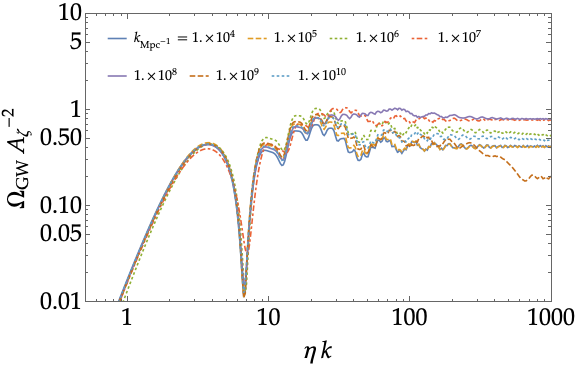

In [ ]:
OGWvsEtaFig = ListLogLogPlot[{OGW4List.{{1,0},{0,Az^-2}},OGW5List.{{1,0},{0,Az^-2}},OGW6List.{{1,0},{0,Az^-2}},OGW7List.{{1,0},{0,Az^-2}},OGW8List.{{1,0},{0,Az^-2}},
                OGW9List.{{1,0},{0,Az^-2}},OGW10List.{{1,0},{0,Az^-2}}},
               PlotStyle->{Automatic,Dashed,Dotted,DotDashed,Automatic,Dashed,Dotted},
               PlotRange->{{0.5,1000},{10^-2,10}},
               PlotLegends->Placed[LineLegend[{Subscript[k,Superscript[Mpc,-1]] == ScientificForm[1.0 10^4,2],ScientificForm[1.0 10^5,2],
                                               1.0 10^6,1.0 10^7,1.0 10^8,1.0 10^9,1.0 10^10},
                                              LabelStyle->Directive[Larger,Black,FontFamily->"Palatino"],LegendMarkerSize->20,
                                              LegendLayout->{"Row",2}],{0.45,0.85}], 
               FrameLabel->{k \[Eta],Subscript[\[CapitalOmega],GW]Superscript[Subscript[A,\[Zeta]],-2]}]

In [ ]:
Export["git/paper/QCD_GW/figYT/OGWvsEta.pdf",OGWvsEtaFig];

In [ ]:
OGW0h2[i_] := (gs0/gssol[xf/kList[[i]]])^(4/3) grhosol[xf/kList[[i]]]/grho0 Or0h2 OGWc[i,xf]

In [ ]:
OGW0h2[301] // Quiet

-9
2.737 10

In [ ]:
OGW0h2List = ParallelTable[{kList[[i]],OGW0h2[i] // Quiet},{i,1,Length[kList]}]; // AbsoluteTiming

In [ ]:
Export["git/num/OGW0h2List.dat",OGW0h2List];


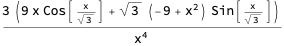

In [ ]:
PhiRad[x_] = 9/x^2 (Sin[x/Sqrt[3]]/(x/Sqrt[3]) - Cos[x/Sqrt[3]]);
PhiRadp[x_] = D[PhiRad[x],x] // Simplify

In [ ]:
IsRad[i_,x_] := NIntegrate[asol[xp/kList[[i]]]/(xp/kList[[i]]) xp Sin[xp]
                     (2PhiRad[xp]^2 + (PhiRad[xp] + xp PhiRadp[xp])^2) ,{xp,xi,x}]
IcRad[i_,x_] := NIntegrate[asol[xp/kList[[i]]]/(xp/kList[[i]]) xp Cos[xp]
                     (2PhiRad[xp]^2 + (PhiRad[xp] + xp PhiRadp[xp])^2) ,{xp,xi,x}]
I2barRad[i_,x_] := (IsRad[i,x]^2+IcRad[i,x]^2)/2

In [ ]:
OGWRad[i_,x_] := 8/243 (asol[x/kList[[i]]]calHsol[x/kList[[i]]])^(-2) (1-1/4)^2 I2barRad[i,x] Az^2;
OGW0Radh2[i_] := (gs0/gssol[xf/kList[[i]]])^(4/3) grhosol[xf/kList[[i]]]/grho0 Or0h2 OGWRad[i,xf];

In [ ]:
OGW0Radh2[301] // Quiet

-9
1.182 10

In [ ]:
OGW0Radh2List = ParallelTable[{kList[[i]],OGW0Radh2[i] // Quiet},{i,1,Length[kList]}]; // AbsoluteTiming

In [ ]:
Export["git/num/OGW0Radh2List.dat",OGW0Radh2List];


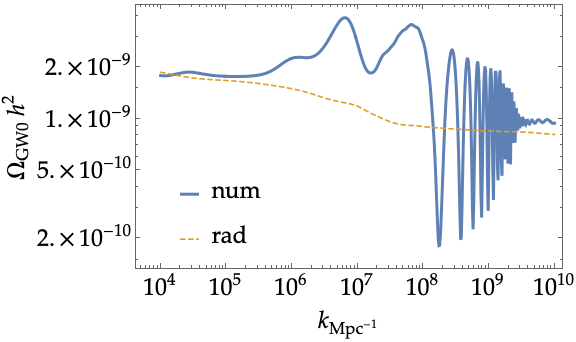

In [ ]:
OGW0h2SpecFig = ListLogLogPlot[{OGW0h2List,OGW0Radh2List}, 
                    FrameLabel->{Subscript[k,Superscript[Mpc,-1]],Subscript[\[CapitalOmega],GW0]Superscript[h,2]},
                    PlotLegends->Placed[LineLegend[{"num","rad"},LegendMarkerSize->20],
                                        {0.2,0.2}],
                    PlotStyle->{AbsoluteThickness[3],Dashed}
                   ]

In [ ]:
Export["git/paper/QCD_GW/figYT/OGW0h2Spec.pdf",OGW0h2SpecFig];

## Linear GW 練習

In [98]:
xi = 0.01;
xf = 1000;

In [100]:
Clear[k]


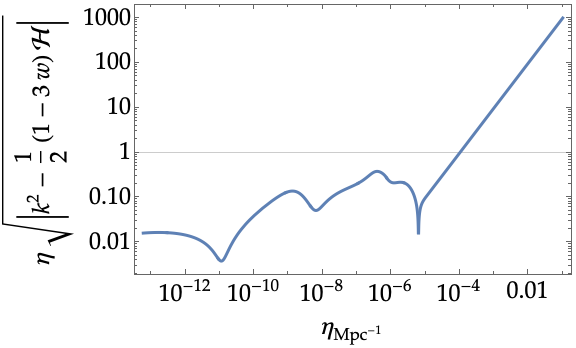

In [ ]:
kk = 10^4;
LogLogPlot[Sqrt[Abs[kk^2-(1-3EoSwint[eta])/2*calHsol[eta]^2]]eta,{eta,etai,xf/kk},GridLines->{None,{1}},
           FrameLabel->{Subscript[\[Eta],Superscript[Mpc,-1]],
                        Sqrt[Abs[Superscript[k,2]-(1-3w)/2*\[ScriptCapitalH]]]\[Eta]}]

In [8]:
DSolve[{G''[eta]+k^2 G[eta]==0,G[0]==1,G'[0]==0},G[eta],eta]
DSolve[{G''[eta]+k^2 G[eta]==0,G'[0]==k,G[0]==0},G[eta],eta]

{{G[eta] -> Cos[eta k]}}
{{G[eta] -> Sin[eta k]}}

In [126]:
k = 10^4;
Gsol1 = NDSolve[{G''[eta]+(k^2-(1-3EoSwint[eta])/2*calHsol[eta]^2)G[eta]==0,G[etai]==1,G'[etai]==0},
                 G[eta],{eta,etai,xf/k},MaxSteps->10^6,WorkingPrecision->20][[1]]; // AbsoluteTiming
Gsol2 = NDSolve[{G''[eta]+(k^2-(1-3EoSwint[eta])/2*calHsol[eta]^2)G[eta]==0,G'[etai]==k,G[etai]==0},
                 G[eta],{eta,etai,xf/k},MaxSteps->10^6,WorkingPrecision->20][[1]]; // AbsoluteTiming

The precision of the differential equation (`1`) is less than WorkingPrecision (`2`).:                                                                             13                                                         1                                                        2/3                                                               -14                                                                                         -14
                                                                  9.44047 10   (---------------------------------------------------------------------------------------------------------------)    rho[InterpolatingFunction[{{5.84588938886740886137147192564 10   , 0.100000000000000005551115123126}}, <>][eta]] (1 - 3 InterpolatingFunction[{{5.84589 10   , 0.0992774}}, <>][eta])
                                                                                                                                             -14
                                                                                gs[InterpolatingFunction[{{5.84588938886740886137147192564 10   , 0.100000000000000005551115123126}}, <>][eta]]                                                                                                                                                                                                                         -14                     -14
The precision of the differential equation ({{G[eta] (100000000 - -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------) + G''[eta] == 0, G[5.84589 10   ] == 1, G'[5.84589 10   ] == 0}, {}, {}, {}, {}}) is less than WorkingPrecision (20.).
                                                                                                                                                                                                                                 -14                                              2
                                                                                                                                                                       InterpolatingFunction[{{5.84588938886740886137147192564 10   , 0.100000000000000005551115123126}}, <>][eta]

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.099284738785769141916} lies outside the range of data in the interpolating function. Extrapolation will be used.

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.099284738785769141916} lies outside the range of data in the interpolating function. Extrapolation will be used.

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.099284738785769141916} lies outside the range of data in the interpolating function. Extrapolation will be used.

Further output of `1` will be suppressed during this calculation.: Further output of InterpolatingFunction::dmval will be suppressed during this calculation.

The precision of the differential equation (`1`) is less than WorkingPrecision (`2`).:                                                                             13                                                         1                                                        2/3                                                               -14                                                                                         -14
                                                                  9.44047 10   (---------------------------------------------------------------------------------------------------------------)    rho[InterpolatingFunction[{{5.84588938886740886137147192564 10   , 0.100000000000000005551115123126}}, <>][eta]] (1 - 3 InterpolatingFunction[{{5.84589 10   , 0.0992774}}, <>][eta])
                                                                                                                                             -14
                                                                                gs[InterpolatingFunction[{{5.84588938886740886137147192564 10   , 0.100000000000000005551115123126}}, <>][eta]]                                                                                                                                                                                                                          -14                        -14
The precision of the differential equation ({{G[eta] (100000000 - -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------) + G''[eta] == 0, G'[5.84589 10   ] == 10000, G[5.84589 10   ] == 0}, {}, {}, {}, {}}) is less than WorkingPrecision (20.).
                                                                                                                                                                                                                                 -14                                              2
                                                                                                                                                                       InterpolatingFunction[{{5.84588938886740886137147192564 10   , 0.100000000000000005551115123126}}, <>][eta]

{13.0631, Null}
{11.6291, Null}

In [129]:
G1[eta_] = G[eta]/.Gsol1;
G2[eta_] = G[eta]/.Gsol2;
G1p[eta_] = D[G1[eta],eta];
G2p[eta_] = D[G2[eta],eta];

-Graphics-
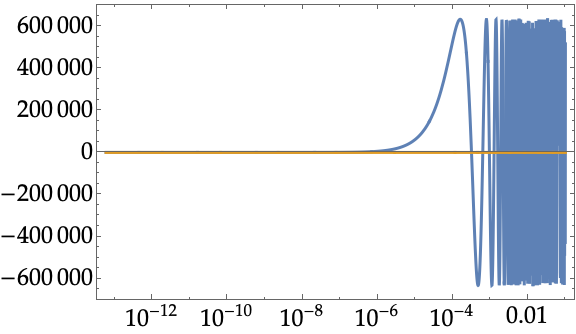

In [133]:
LogLinearPlot[{G1[eta],G2[eta]},{eta,etai,xf/k},PlotRange->Full]

In [134]:
GreenG[eta_,etap_] = (G1[eta]G2[etap]-G2[eta]G1[etap])/(G1p[etap]G2[etap]-G1[etap]G2p[etap]);

-Graphics-
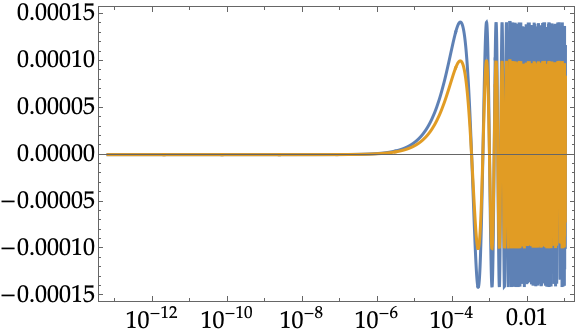

In [135]:
LogLinearPlot[{GreenG[eta,1.1etai],1/k Sin[k(eta-1.1etai)]},{eta,1.1etai,xf/k},PlotRange->Full]

## Linear GW

In [136]:
xi = 0.01;
xf = 1000;

In [146]:
Clear[k];
ParallelEvaluate[Clear[k]];
G1List[eta_] = ParallelTable[k=10^logk;
                    ptbsol = NDSolve[{G''[eta]+(k^2-(1-3EoSwint[eta])/2*calHsol[eta]^2)G[eta]==0,
                                    G[etai]==1,G'[etai]==0},G[eta],{eta,etai,xf/k},
                                    MaxSteps->10^6,WorkingPrecision->20][[1]] // Quiet;
                    {k,G[eta]/.ptbsol},{logk,4,10,0.001}]; // AbsoluteTiming
G2List[eta_] = ParallelTable[k=10^logk;
                    ptbsol = NDSolve[{G''[eta]+(k^2-(1-3EoSwint[eta])/2*calHsol[eta]^2)G[eta]==0,
                                    G'[etai]==k,G[etai]==0},G[eta],{eta,etai,xf/k},
                                    MaxSteps->10^6,WorkingPrecision->20][[1]] // Quiet;
                    {k,G[eta]/.ptbsol},{logk,4,10,0.001}]; // AbsoluteTiming
Clear[k];
ParallelEvaluate[Clear[k]];

{45041.7, Null}
{34272.4, Null}

In [153]:
Export["git/num/neutrino/G1ListFine.wdx",G1List[eta]]; // AbsoluteTiming
Export["git/num/neutrino/G2ListFine.wdx",G2List[eta]]; // AbsoluteTiming

{5731.99, Null}
{3414.46, Null}

-Graphics-
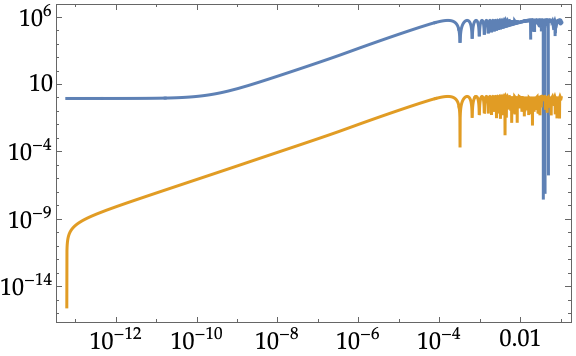

In [152]:
LogLogPlot[{Abs[G1List[eta][[10,2]]],Abs[G2List[eta][[10,2]]]},{eta,etai,xf/G1List[eta][[10,1]]},PlotRange->Full]

## Monochromatic w/ num G

In [ ]:
PhiList[x_] = Import["git/num/neutrino/PhiList.wdx"]; // AbsoluteTiming
G1List[eta_] = Import["git/num/neutrino/G1List.wdx"]; // AbsoluteTiming
G2List[eta_] = Import["git/num/neutrino/G2List.wdx"]; // AbsoluteTiming

Out[82]:
 
 
 
 
 Out[83]:
 
 
 
 
 Out[84]:

In [157]:
PhiMode[x_] = Table[PhiList[x][[i,2]],{i,Length[PhiList[x]]}];
PhipMode[x_] = Table[D[PhiMode[x][[i]],x],{i,Length[PhiMode[x]]}];
kList = Table[PhiList[x][[i,1]],{i,Length[PhiList[x]]}];

In [160]:
G1Mode[eta_] = Table[G1List[eta][[i,2]],{i,Length[G1List[eta]]}];
G1pMode[eta_] = Table[D[G1Mode[eta][[i]],eta],{i,Length[G1Mode[eta]]}];
G2Mode[eta_] = Table[G2List[eta][[i,2]],{i,Length[G2List[eta]]}];
G2pMode[eta_] = Table[D[G2Mode[eta][[i]],eta],{i,Length[G2Mode[eta]]}];

In [164]:
GreenGMode[eta_,etap_] = Table[(G1Mode[eta][[i]]G2Mode[etap][[i]]-G2Mode[eta][[i]]G1Mode[etap][[i]])
                               /(G1pMode[etap][[i]]G2Mode[etap][[i]]-G1Mode[etap][[i]]G2pMode[etap][[i]]),{i,Length[G1Mode[eta]]}];

In [170]:
Export["git/num/neutrino/PhiMode.wdx", PhiMode[x]]; // AbsoluteTiming
Export["git/num/neutrino/PhipMode.wdx", PhipMode[x]]; // AbsoluteTiming
Export["git/num/neutrino/kList.dat", kList]; // AbsoluteTiming
Export["git/num/neutrino/GreenGMode.wdx", GreenGMode[eta,etap]]; // AbsoluteTiming

{276.434, Null}
{325.973, Null}
{0.302296, Null}
{44456.8, Null}

In [174]:
xi = 0.01;
xf = 400;

In [176]:
IG[i_,x_] := NIntegrate[asol[xp/kList[[i]]] kList[[i]]^2 GreenGMode[x/kList[[i]],xp/kList[[i]]][[i]]
                        (2PhiMode[xp][[i]]^2 + 4/3/(1+EoSwsol[xp/kList[[i]]])
                         (PhiMode[xp][[i]] + kList[[i]]/calHsol[xp/kList[[i]]] PhipMode[xp][[i]])^2), {xp,xi,x}(*, WorkingPrecision->30*)]

In [177]:
Az = 0.01;
Or0h2 = 4.2 10^(-5);
OGWcG[i_,x_] := 8/243 (asol[x/kList[[i]]]calHsol[x/kList[[i]]])^(-2) (1-1/4)^2 IG[i,x]^2 Az^2

In [180]:
OGWcG[4260(*367*)(*37*),xf] // Quiet // AbsoluteTiming

-7
{51.7466, 3.14092 10  }

In [ ]:
kList[[1]]
OGWcG[1,1] // Quiet // AbsoluteTiming

Out[109]:
 
 
 10000. 
 
 Out[110]:
 
 
 -7
{37.5648, 3.94641 10 }

In [ ]:
OGWcG4List = Table[{10^logx,OGWcG[1,10^logx] // Quiet},{logx,0,Log10[xf],0.01}]; // AbsoluteTiming

In [ ]:
Export["git/num/neutrino/OGWcG4List.dat",OGWcG4List];

In [ ]:
OGWcG4List = Import["git/num/neutrino/OGWcG4List.dat"];

x                      2         x
3 (9 x Cos[-------] + Sqrt[3] (-9 + x ) Sin[-------])
           Sqrt[3]                          Sqrt[3]
-----------------------------------------------------
                          4
                         x
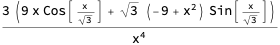

In [182]:
aRad[eta_] = scaleai(eta/etai);
PhiRad[x_] = 9/x^2 (Sin[x/Sqrt[3]]/(x/Sqrt[3]) - Cos[x/Sqrt[3]]);
PhiRadp[x_] = D[PhiRad[x],x] // Simplify
IRad[x_] = Integrate[scaleai/etai xp Sin[x-xp]
                     (2PhiRad[xp]^2 + (PhiRad[xp] + xp PhiRadp[xp])^2) ,{xp,xi,x}] // Simplify;
OGWRad[k_,eta_] = 8/243 (aRad[eta]/eta)^(-2) (1-1/4)^2 IRad[k eta]^2 Az^2;


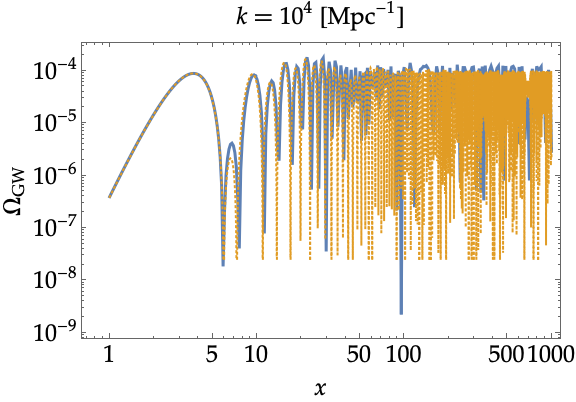

In [ ]:
FigOGWcG4 = Show[ListLogLogPlot[OGWcG4List,FrameLabel->{{Subscript[\[CapitalOmega],GW],None},{x,Row[{k==Superscript[10,4], " [", Superscript[Mpc,-1], "]"}]}}], 
                 LogLogPlot[OGWRad[10^4,x/10^4],{x,1,10^3},PlotStyle->{AbsoluteThickness[2],Dotted,Color[[2]]}]]

In [ ]:
Export["neutrino/OGWcG4.pdf",FigOGWcG4];

In [ ]:
OGWcG4LinearList = Table[{x,OGWcG[1,x] // Quiet},{x,980,1000,0.1}]; // AbsoluteTiming


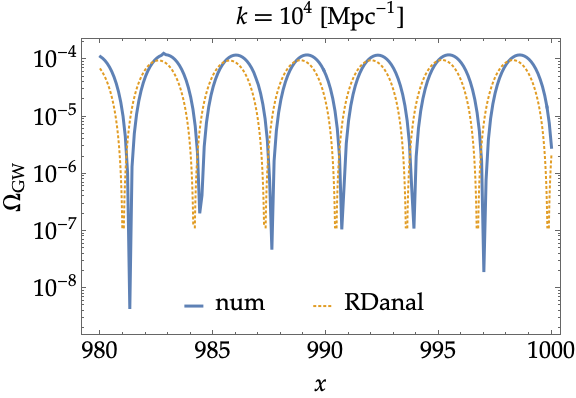

In [ ]:
FigOGWcG4Linear = Show[ListLogPlot[OGWcG4LinearList, FrameLabel->{{Subscript[\[CapitalOmega],GW],None},{x,Row[{k==Superscript[10,4], " [", Superscript[Mpc,-1], "]"}]}}, 
                                   PlotLegends->Placed[LineLegend[{"num"}, LegendMarkerSize->20],{0.3,0.1}]], 
                       LogPlot[OGWRad[10^4,x/10^4],{x,980,1000},PlotStyle->{AbsoluteThickness[2],Dotted,Color[[2]]}, 
                               PlotLegends->Placed[LineLegend[{"RDanal"}, LegendMarkerSize->20],{0.6,0.1}]]]

In [ ]:
Export["OGWcG4Linear.pdf",FigOGWcG4Linear];

In [ ]:
OGWcG7List = Table[{10^logx,OGWcG[301,10^logx] // Quiet},{logx,Log10[xi],Log10[xf](*,0.01*)}]; // AbsoluteTiming

In [ ]:
OGWcG7LinearList = Table[{x,OGWcG[301,x] // Quiet}, {x,0.1,100,0.1}]; // AbsoluteTiming

In [ ]:
Export["git/num/OGWcG7List.dat",OGWcG7List];

In [ ]:
OGWcG7List = Import["git/num/OGWcG7List.dat"];


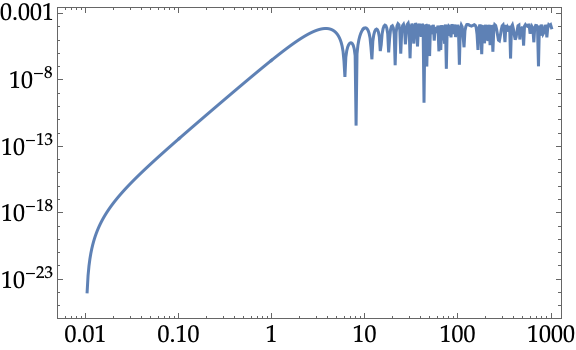

In [ ]:
ListLogLogPlot[OGWcG7List]


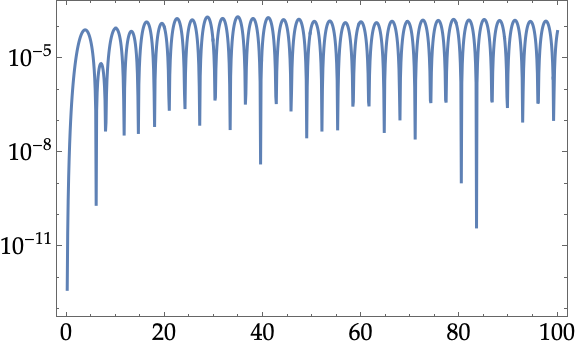

In [ ]:
ListLogPlot[OGWcG7LinearList]

In [ ]:
OGWG0h2[i_] := (gs0/gssol[xf/kList[[i]]])^(4/3) grhosol[xf/kList[[i]]]/grho0 Or0h2 OGWcG[i,xf]

In [ ]:
OGWG0h2[301] // Quiet // AbsoluteTiming

-9
{1.50258, 3.06609 10 }

In [ ]:
OGWG0h2List = Table[{kList[[i]],OGWG0h2[i] // Quiet},{i,1,Length[kList]}]; // AbsoluteTiming

In [ ]:
Export["git/num/neutrino/OGWG0h2List.dat",OGWG0h2List];


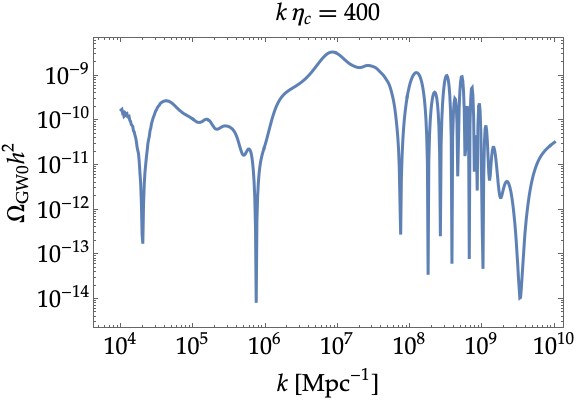

In [ ]:
FigOGWG0h2 = ListLogLogPlot[OGWG0h2List, FrameLabel->{{Row[{Subscript[\[CapitalOmega],GW0], h^2}], None},
                                                      {Row[{k, " [", Superscript[Mpc,-1], "]"}], k Subscript[\[Eta],c]==400}}]

In [ ]:
Export["neutrino/OGWG0h2.pdf",FigOGWG0h2];

In [ ]:
Log10[4.6 10^7/kList[[1]]]/0.01
kList[[367]]

Out[307]:
 
 
 366.276 
 
 Out[308]:
 
 
 7
4.57088 10

In [ ]:
OGWcG[367,xf]

InterpolatingFunction::dmval: 
 -6
 Input value {8.75105 10 } lies outside the range of data in the
 interpolating function. Extrapolation will be used.

InterpolatingFunction::dmval: 
 -6
 Input value {8.75105 10 } lies outside the range of data in the
 interpolating function. Extrapolation will be used.

InterpolatingFunction::dmval: 
 -6
 Input value {8.75105 10 } lies outside the range of data in the
 interpolating function. Extrapolation will be used.

General::stop: Further output of InterpolatingFunction::dmval
 will be suppressed during this calculation.

NIntegrate::ncvb: 
 NIntegrate failed to converge to prescribed accuracy after 9
 recursive bisections in xp near {xp} = {32.0342}. NIntegrate obtained 
 -6 -10
 7.23171 10 and 2.16184 10 for the integral and error estimates.
 0.0000250465

In [ ]:
OGWcG23e3List = Table[{10^logx,OGWcG[37,10^logx] // Quiet},{logx,0,Log10[xf],0.01}]; // AbsoluteTiming


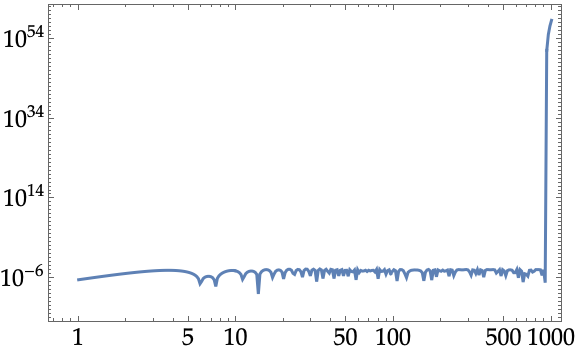

In [ ]:
ListLogLogPlot[OGWcG23e3List]

In [188]:
OGWcG18e7List = Table[{10^logx,OGWcG[4260,10^logx] // Quiet}, {logx,0,Log10[xf],0.01}]; // AbsoluteTiming

{2725.11, Null}

Legended[Legended[-Graphics-, Placed[LineLegend[{Directive[PointSize[0.00733333], 
 
>        RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]]}, {num}, 
 
>      LegendMarkers -> {{False, Automatic}}, Joined -> {True}, 
 
>      LabelStyle -> Directive[GrayLevel[0], Large, FontFamily -> Palatino], 
 
>      LegendLayout -> Column, LegendMarkerSize -> 20], {0.2, 0.2}, Identity]], 
 
>   {Placed[LineLegend[{Directive[Opacity[1.], AbsoluteThickness[1.6], 
 
>        Dashing[{0, Small}], RGBColor[0.882353, 0.611765, 0.141176]]}, {RD}, 
 
>      LegendMarkers -> None, LabelStyle -> 
 
>       Directive[GrayLevel[0], Large, FontFamily -> Palatino], LegendLayout -> Column, 
 
>      LegendMarkerSize -> 20], {0.2, 0.2}, Identity]}]
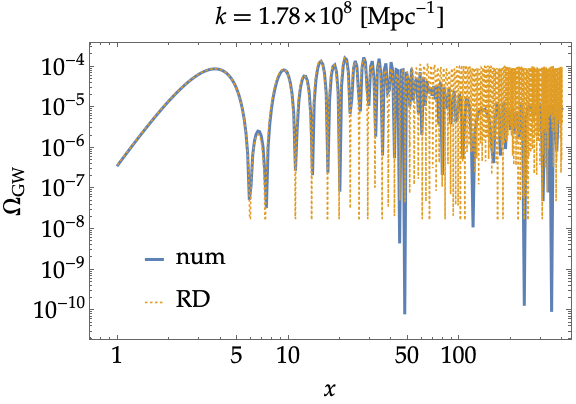

In [189]:
FigOGWcG18e7 = Show[ListLogLogPlot[OGWcG18e7List,FrameLabel->{{Subscript[\[CapitalOmega],GW],None},{x,Row[{k==1.78\[Cross]Superscript[10,8], " [", Superscript[Mpc,-1], "]"}]}}, 
                                   PlotLegends->Placed[LineLegend[{"num"},LegendMarkerSize->20],{0.2,0.2}]], 
                    LogLogPlot[OGWRad[kList[[4260]],x/kList[[4260]]],{x,1,xf},PlotStyle->{Dotted,Color[[2]]}, 
                               PlotLegends->{Placed[LineLegend[{"RD"},LegendMarkerSize->20],{0.2,0.2}]}]]

In [ ]:
Export["neutrino/OGWcG18e7.pdf",FigOGWcG18e7];

## Monochromatic time-ageraged

In [ ]:
PhiList[x_] = Import["git/num/neutrino/PhiList.wdx"]; // AbsoluteTiming
(*G1List[eta_] = Import["git/num/neutrino/G1List.wdx"]; // AbsoluteTiming
G2List[eta_] = Import["git/num/neutrino/G2List.wdx"]; // AbsoluteTiming*)

In [ ]:
xi = 0.01;
xf = 400;
dx = \[Pi];

In [ ]:
PhiMode[x_] = Table[PhiList[x][[i,2]],{i,Length[PhiList[x]]}];
PhipMode[x_] = Table[D[PhiMode[x][[i]],x],{i,Length[PhiMode[x]]}];
kList = Table[PhiList[x][[i,1]],{i,Length[PhiList[x]]}];

In [ ]:
G1Mode[eta_] = Table[G1List[eta][[i,2]],{i,Length[G1List[eta]]}];
G1pMode[eta_] = Table[D[G1Mode[eta][[i]],eta],{i,Length[G1Mode[eta]]}];
G2Mode[eta_] = Table[G2List[eta][[i,2]],{i,Length[G2List[eta]]}];
G2pMode[eta_] = Table[D[G2Mode[eta][[i]],eta],{i,Length[G2Mode[eta]]}];

In [ ]:
GreenGMode[eta_,etap_] = Table[(G1Mode[eta][[i]]G2Mode[etap][[i]]-G2Mode[eta][[i]]G1Mode[etap][[i]])
                               /(G1pMode[etap][[i]]G2Mode[etap][[i]]-G1Mode[etap][[i]]G2pMode[etap][[i]]),{i,Length[G1Mode[eta]]}];

In [ ]:
IG[i_,x_] := NIntegrate[asol[xp/kList[[i]]] kList[[i]]^2 GreenGMode[x/kList[[i]],xp/kList[[i]]][[i]]
                        (2PhiMode[xp][[i]]^2 + 4/3/(1+EoSwsol[xp/kList[[i]]])
                         (PhiMode[xp][[i]] + kList[[i]]/calHsol[xp/kList[[i]]] PhipMode[xp][[i]])^2), {xp,xi,x}]
IG2bar[i_,x_] := (IG[i,x-dx/2]^2 + IG[i,x-dx/4]^2 + IG[i,x]^2 + IG[i,x+dx/4]^2 + IG[i,x+dx/2]^2)/5

In [ ]:
Az = 0.01;
Or0h2 = 4.2 10^(-5);
OGWcGbar[i_,x_] := 8/243 (asol[x/kList[[i]]]calHsol[x/kList[[i]]])^(-2) (1-1/4)^2 IG2bar[i,x] Az^2

In [ ]:
OGWG0h2bar[i_] := (gs0/gssol[xf/kList[[i]]])^(4/3) grhosol[xf/kList[[i]]]/grho0 Or0h2 OGWcGbar[i,xf]

In [ ]:
kList[[426]]
OGWG0h2bar[426] // Quiet // AbsoluteTiming

Out[144]:
 
 
 8
1.77828 10 
 
 Out[145]:
 
 
 -10
{8.08827, 2.10278 10 }

In [ ]:
OGWG0h2barList = Table[{kList[[i]],OGWG0h2bar[i] // Quiet},{i,1,Length[kList]}]; // AbsoluteTiming

In [ ]:
Export["git/num/neutrino/OGWG0h2barList.dat", OGWG0h2barList];

In [ ]:
OGWG0h2barList = Import["git/num/neutrino/OGWG0h2barList.dat"];


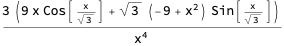

In [ ]:
aRad[eta_] = scaleai(eta/etai);
PhiRad[x_] = 9/x^2 (Sin[x/Sqrt[3]]/(x/Sqrt[3]) - Cos[x/Sqrt[3]]);
PhiRadp[x_] = D[PhiRad[x],x] // Simplify

In [ ]:
IsRad[x_] = Simplify[Integrate[scaleai/etai xp Sin[xp] (2PhiRad[xp]^2 + (PhiRad[xp] + xp PhiRadp[xp])^2) ,{xp,xi,x}, Assumptions->{x>1}]];
IcRad[x_] = Simplify[Integrate[scaleai/etai xp Cos[xp] (2PhiRad[xp]^2 + (PhiRad[xp] + xp PhiRadp[xp])^2) ,{xp,xi,x}, Assumptions->{x>1}]];
I2barRad[x_] = Simplify[(IsRad[x]^2+IcRad[x]^2)/2];

In [ ]:
I2barRad[xf]

In [ ]:
OGWRad[x_] = 8/243 (scaleai/etai)^(-2) (1-1/4)^2 I2barRad[x] Az^2;
OGW0Radh2[i_] = (gs0/gssol[1/kList[[i]]])^(4/3) grhosol[1/kList[[i]]]/grho0 Or0h2 OGWRad[xf];
(*(gs0/gssol[xf/kList[[i]]])^(4/3) grhosol[xf/kList[[i]]]/grho0 Or0h2 OGWRad[xf]*)

In [ ]:
OGW0Radh2[301] // Quiet // AbsoluteTiming

In [ ]:
OGW0Radh2List = Table[{kList[[i]],OGW0Radh2[i] // Quiet},{i,1,Length[kList]}]; // AbsoluteTiming


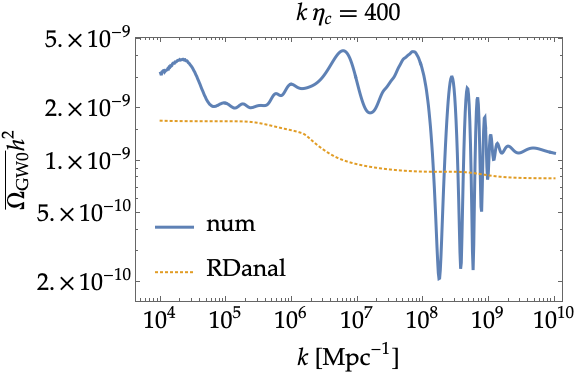

In [ ]:
FigOGWG0h2bar = ListLogLogPlot[{OGWG0h2barList, OGW0Radh2List}, 
                               FrameLabel->{{Row[{OverBar[Subscript[\[CapitalOmega],GW0]], h^2}], None},{Row[{k, " [", Superscript[Mpc,-1], "]"}], k Subscript[\[Eta],c]==400}}, 
                               PlotStyle->{AbsoluteThickness[3],{AbsoluteThickness[2],Dotted}}, PlotLegends->Placed[{"num", "RDanal"},{0.2,0.2}]]

In [ ]:
Export["neutrino/OGWG0h2bar_shift.pdf", FigOGWG0h2bar];


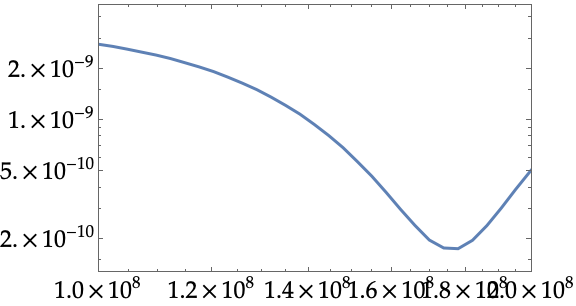

In [ ]:
ListLogLogPlot[OGWG0h2barList, PlotRange->{{10^8,2 10^8},Automatic}]

In [ ]:
kList[[426]]

8
1.77828 10

## GW spectrum by monochromatic scalar (fine)

In [82]:
xi = 0.01;
xf = 1000;

In [84]:
kp = 1.78 10^8;

In [85]:
PhiMode178e6[x_] = Phi[x] /. NDSolve[{Phi''[x] + 3calHsol[x/kp](1+cs2int[x/kp])/kp Phi'[x] + (cs2int[x/kp]+3calHsol[x/kp]^2(cs2int[x/kp]-EoSwint[x/kp])/kp^2)Phi[x] == 0,
                                    Phi[xi] == 1, Phi'[xi] == 0},
                                    Phi[x],{x,xi,xf}, (*WorkingPrecision->30,*) MaxSteps->10^5][[1]]; // AbsoluteTiming

{0.756861, Null}

In [86]:
PhipMode178e6[x_] = D[PhiMode178e6[x],x];

In [104]:
G1List178e6[eta_] = ParallelTable[k=10^logk;
                        ptbsol = NDSolve[{G''[eta]+(k^2-(1-3EoSwint[eta])/2*calHsol[eta]^2)G[eta]==0,
                                        G[etai]==1,G'[etai]==0},G[eta],{eta,etai,xf/k},
                                        MaxSteps->10^6(*,WorkingPrecision->20*)][[1]] // Quiet;
                        {k,G[eta]/.ptbsol},{logk,Log10[kp]-1,Log10[2kp],0.001}]; // AbsoluteTiming
G2List178e6[eta_] = ParallelTable[k=10^logk;
                        ptbsol = NDSolve[{G''[eta]+(k^2-(1-3EoSwint[eta])/2*calHsol[eta]^2)G[eta]==0,
                                        G'[etai]==k,G[etai]==0},G[eta],{eta,etai,xf/k},
                                        MaxSteps->10^6(*,WorkingPrecision->20*)][[1]] // Quiet;
                        {k,G[eta]/.ptbsol},{logk,Log10[kp]-1,Log10[2kp],0.001}]; // AbsoluteTiming
Clear[k];
ParallelEvaluate[Clear[k]];

{2978.18, Null}
{2743.69, Null}

In [108]:
Export["git/num/neutrino/G1List178e6Light.wdx", G1List178e6[eta]]; // AbsoluteTiming
Export["git/num/neutrino/G2List178e6Light.wdx", G2List178e6[eta]]; // AbsoluteTiming

{417.774, Null}
{401.901, Null}

In [88]:
G1List178e6[eta_] = Import["git/num/neutrino/G1List178e6.wdx"]; // AbsoluteTiming
G2List178e6[eta_] = Import["git/num/neutrino/G2List178e6.wdx"]; // AbsoluteTiming

{502.118, Null}
{342.419, Null}

In [110]:
kList178e6 = Table[G1List178e6[eta][[i,1]],{i,Length[G1List178e6[eta]]}];

In [111]:
G1Mode178e6[eta_] = Table[G1List178e6[eta][[i,2]],{i,Length[G1List178e6[eta]]}];
G1pMode178e6[eta_] = Table[D[G1Mode178e6[eta][[i]],eta],{i,Length[G1Mode178e6[eta]]}];
G2Mode178e6[eta_] = Table[G2List178e6[eta][[i,2]],{i,Length[G2List178e6[eta]]}];
G2pMode178e6[eta_] = Table[D[G2Mode178e6[eta][[i]],eta],{i,Length[G2Mode178e6[eta]]}];

In [115]:
GreenGMode178e6[eta_,etap_] = Table[(G1Mode178e6[eta][[i]]G2Mode178e6[etap][[i]]-G2Mode178e6[eta][[i]]G1Mode178e6[etap][[i]])
                                   /(G1pMode178e6[etap][[i]]G2Mode178e6[etap][[i]]-G1Mode178e6[etap][[i]]G2pMode178e6[etap][[i]]),
                                   {i,Length[G1Mode178e6[eta]]}]; // AbsoluteTiming

{3.41537, Null}

In [116]:
xi = 0.01;
xc = 400;
dx = \[Pi];

In [119]:
IGspec178e6[i_,x_] := kList178e6[[i]]^3 NIntegrate[asol[etap] GreenGMode178e6[x/kList178e6[[i]], etap][[i]] (2PhiMode178e6[kp etap]^2 
                                                    + 4/3/(1+EoSwsol[etap]) (PhiMode178e6[kp etap] + kp/calHsol[etap] PhipMode178e6[kp etap])^2 ), 
                                                    {etap,xi/kp,x/kp}(*, WorkingPrecision->30*)]
IGspec2bar178e6[i_,x_] := (IGspec178e6[i,x-dx/2]^2 + IGspec178e6[i,x-dx/4]^2 + IGspec178e6[i,x]^2 + IGspec178e6[i,x+dx/4]^2 + IGspec178e6[i,x+dx/2]^2)/5

In [121]:
IGspec178e6[1,xc] // AbsoluteTiming

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.0000224719} lies outside the range of data in the interpolating function. Extrapolation will be used.

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.0000224719} lies outside the range of data in the interpolating function. Extrapolation will be used.

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.0000224719} lies outside the range of data in the interpolating function. Extrapolation will be used.

Further output of `1` will be suppressed during this calculation.: Further output of InterpolatingFunction::dmval will be suppressed during this calculation.

NIntegrate failed to converge to prescribed accuracy after `1` recursive bisections in `2` near `3` = `4`. NIntegrate obtained `5` and `6` for the integral and error estimates.:                                                                                                                    -7                                  -29               -34
NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in etap near {etap} = {6.27639 10  }. NIntegrate obtained -1.16572 10    and 3.18612 10    for the integral and error estimates.

-8
{1.28071, -6.57439 10  }

In [122]:
Az = 0.01;
OGWcGspecbar178e6[i_,x_] := 8/243 (asol[x/kList178e6[[i]]]calHsol[x/kList178e6[[i]]])^(-2) UnitStep[1-kList178e6[[i]]/2/kp]*
    (1-(kList178e6[[i]]/2/kp)^2)^2 (kp/kList178e6[[i]])^2 IGspec2bar178e6[i,x] Az^2

In [124]:
OGWcGspecbar178e6[1,xc] // AbsoluteTiming

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.0000223837} lies outside the range of data in the interpolating function. Extrapolation will be used.

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.0000223837} lies outside the range of data in the interpolating function. Extrapolation will be used.

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.0000223837} lies outside the range of data in the interpolating function. Extrapolation will be used.

Further output of `1` will be suppressed during this calculation.: Further output of InterpolatingFunction::dmval will be suppressed during this calculation.

NIntegrate failed to converge to prescribed accuracy after `1` recursive bisections in `2` near `3` = `4`. NIntegrate obtained `5` and `6` for the integral and error estimates.:                                                                                                                    -7                                -29               -34
NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in etap near {etap} = {6.29546 10  }. NIntegrate obtained 6.9555 10    and 6.53344 10    for the integral and error estimates.

NIntegrate failed to converge to prescribed accuracy after `1` recursive bisections in `2` near `3` = `4`. NIntegrate obtained `5` and `6` for the integral and error estimates.:                                                                                                                    -7                                 -29               -34
NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in etap near {etap} = {6.26407 10  }. NIntegrate obtained 4.09464 10    and 3.26185 10    for the integral and error estimates.

NIntegrate failed to converge to prescribed accuracy after `1` recursive bisections in `2` near `3` = `4`. NIntegrate obtained `5` and `6` for the integral and error estimates.:                                                                                                                    -7                                  -29               -34
NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in etap near {etap} = {6.27639 10  }. NIntegrate obtained -1.16572 10    and 3.18612 10    for the integral and error estimates.

Further output of `1` will be suppressed during this calculation.: Further output of NIntegrate::ncvb will be suppressed during this calculation.

-6
{6.10544, 7.96705 10  }

In [126]:
OGWcGspecbar178e6List = Table[{kList178e6[[i]]/kp, OGWcGspecbar178e6[i,xc] // Quiet}, {i,1,Length[kList178e6](*,100*)}]; // AbsoluteTiming

{7812.75, Null}

In [131]:
Export["OGWcGspecbar178e6.dat", OGWcGspecbar178e6];

In [129]:
OGWcGspecbar178e6ListSelected = Select[OGWcGspecbar178e6List, #[[2]]<1&];c

x                      2         x
3 (9 x Cos[-------] + Sqrt[3] (-9 + x ) Sin[-------])
           Sqrt[3]                          Sqrt[3]
-----------------------------------------------------
                          4
                         x
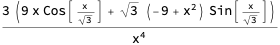

In [135]:
aRad[eta_] = scaleai(eta/etai);
PhiRad[x_] = 9/x^2 (Sin[x/Sqrt[3]]/(x/Sqrt[3]) - Cos[x/Sqrt[3]]);
PhiRadp[x_] = D[PhiRad[x],x] // Simplify

In [168]:
IsRadGen[k_,ks_,x_] = Integrate[scaleai/etai xp Sin[xp] (2PhiRad[ks xp/k]^2 + (PhiRad[ks xp/k] + ks xp/k PhiRadp[ks xp/k])^2) ,{xp,xi,x}, Assumptions->{x>1}];
IcRadGen[k_,ks_,x_] = Integrate[scaleai/etai xp Cos[xp] (2PhiRad[ks xp/k]^2 + (PhiRad[ks xp/k] + ks xp/k PhiRadp[ks xp/k])^2) ,{xp,xi,x}, Assumptions->{x>1}];
I2barRadGen[k_,ks_,x_] = (IsRadGen[k,ks,x]^2 + IcRadGen[k,ks,x]^2)/2;

In [171]:
OGWRadGen[k_,ks_,x_] = 8/243 (scaleai/etai)^(-2) UnitStep[1-k/2/ks] (1-(k/2/ks)^2)^2 (ks/k)^2 I2barRadGen[k,ks,x] Az^2;

In [172]:
OGWRadGenList = Table[{10^logk / ks, OGWRadGen[10^logk,ks,xc]}, {logk,Log10[ks]-1,Log10[2ks],0.01}]; // AbsoluteTiming

{1.08527, Null}

Legended[-Graphics-, Placed[PointLegend[{Directive[PointSize[0.00458333], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[PointSize[0.00458333], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[2], Dashing[{0, Small}]]}, {num, RD}, 
 
>     LegendMarkers -> {{False, Automatic}, {False, Automatic}}, Joined -> {True, True}, 
 
>     LabelStyle -> Directive[GrayLevel[0], Large, FontFamily -> Palatino], 
 
>     LegendLayout -> Column], {0.2, 0.2}, Identity]]
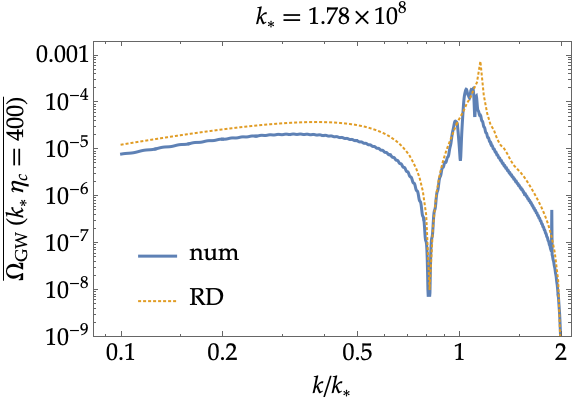

In [187]:
FigOGWcGspecbar178e6 = ListLogLogPlot[{OGWcGspecbar178e6ListSelected, OGWRadGenList}, 
                                    FrameLabel->{{OverBar[Subscript[\[CapitalOmega],GW](Subscript[k,"\[RawStar]"]Subscript[\[Eta],c]==400)], None}, 
                                    {Row[{k,"/",Subscript[k,"\[RawStar]"]}], Subscript[k,"\[RawStar]"]==1.78 10^8}}, 
                                    PlotStyle->{AbsoluteThickness[3],{AbsoluteThickness[2],Dotted}}, PlotRange->{10^-9,2 10^-3}, 
                                    PlotLegends->Placed[{"num", "RD"}, {0.2,0.2}]]

In [188]:
Export["neutrino/OGWcGspecbar178e6Fine.pdf", FigOGWcGspecbar178e6];

Legended[-Graphics-, Placed[PointLegend[{Directive[PointSize[0.00458333], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[PointSize[0.00458333], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[2], Dashing[{0, Small}]]}, {num, RD}, 
 
>     LegendMarkers -> {{False, Automatic}, {False, Automatic}}, Joined -> {True, True}, 
 
>     LabelStyle -> Directive[GrayLevel[0], Large, FontFamily -> Palatino], 
 
>     LegendLayout -> Column], {0.5, 0.2}, Identity]]
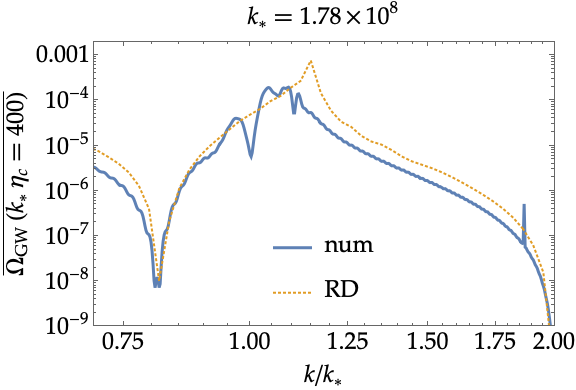

In [190]:
FigOGWcGspecbar178e6Mag = ListLogLogPlot[{OGWcGspecbar178e6ListSelected, OGWRadGenList}, 
                                        FrameLabel->{{OverBar[Subscript[\[CapitalOmega],GW](Subscript[k,"\[RawStar]"]Subscript[\[Eta],c]==400)], None}, 
                                        {Row[{k,"/",Subscript[k,"\[RawStar]"]}], Subscript[k,"\[RawStar]"]==1.78 10^8}}, 
                                        PlotStyle->{AbsoluteThickness[3],{AbsoluteThickness[2],Dotted}}, PlotRange->{{0.7,2},{10^-9,2 10^-3}}, 
                                        PlotLegends->Placed[{"num","RD"}, {0.5,0.2}]]

In [191]:
Export["neutrino/OGWcGspecbar178e6Mag.pdf", FigOGWcGspecbar178e6Mag];